# SignboardLayout
*This is a benchmark dataset designed to advance scene text layout analysis by providing fine-grained semantic annotations and text grouping. Unlike traditional scene text datasets, which focus only on detection and recognition, our dataset enables structured text extraction in real-world signboard environments.*

Github: [https://github.com/Yangchann/SignboardLayout](https://github.com/Yangchann/SignboardLayout)

## Load data

In [4]:
import json

In [6]:
IMAGE_DIR = 'SignboardLayout//images'
ANNOTATION_PATH = 'SignboardLayout//annotations.json'

In [7]:
all_annotations = json.load(open(ANNOTATION_PATH, 'r', encoding='utf-8'))
images = all_annotations['images']
annotations = all_annotations['annotations']

print('Total images:', len(images))
print('Total annotations:', len(annotations))

Total images: 2025
Total annotations: 44227


## Visualization 

In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
map_category = {1: 'type', 2: 'name', 3: 'services', 4: 'address', 5: 'phone', 6: 'email', 7: 'fax', 8: 'website', 9: 'other'}

In [57]:
def visualize_by_category(image_id):
  color_of_category = {}
  image_name = [image['file_name'] for image in images if image['id'] == image_id][0]
  img = cv2.imread(os.path.join(IMAGE_DIR, image_name))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  annotation_of_image = [annotation for annotation in annotations if annotation['image_id'] == image_id]
  for annotation in annotation_of_image:
    category_id = annotation['category_id']
    x, y, w, h = annotation['bbox']
    if category_id not in color_of_category:
      color_of_category[category_id] = tuple([int(x) for x in np.random.randint(0, 255, 3)])
    color = color_of_category[category_id]
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    (text_width, text_height), baseline = cv2.getTextSize(map_category[category_id], cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
    cv2.rectangle(img, (x, y - text_height - baseline), (x + text_width, y), color, thickness=-1)
    cv2.putText(img, map_category[category_id], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

  plt.figure(figsize=(10, 10))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

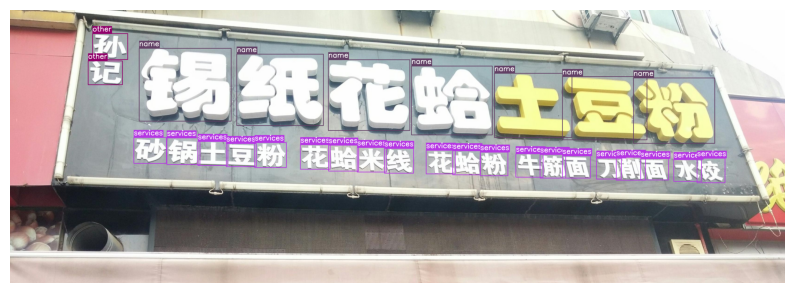

In [58]:
visualize_by_category(3)